Given Training samples:
 [[ 1.   1. ]
 [ 0.2  0.2]
 [ 0.9  0.5]
 [-1.  -1. ]
 [ 0.   0.5]
 [ 0.1  0.5]]

Calculated Mean Centered Input:
 [[ 0.8     0.7167]
 [-0.     -0.0833]
 [ 0.7     0.2167]
 [-1.2    -1.2833]
 [-0.2     0.2167]
 [-0.1     0.2167]]

Classified Classes:
 [1, 1, 1, -1, -1, -1]


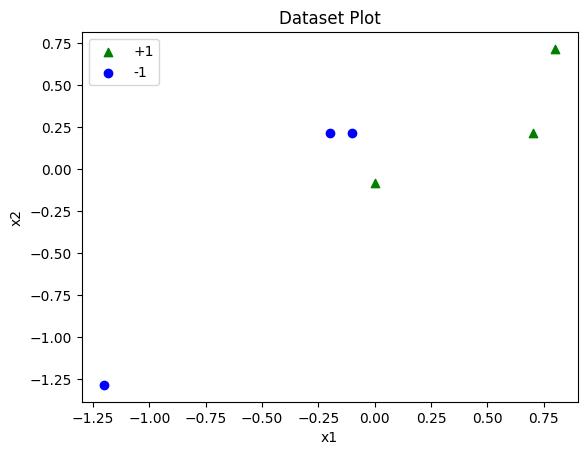

Initial Weight Vector wts:  [1 1 0]

Iteration number -  1

x =  [0.8    0.7167 1.    ]
w =  [1 1 0]
w^Tx =  1.5167000000000002 

-> Sample :  [0.8    0.7167]  is +1
----------------------------------------------------------------------------------------------------

x =  [-0.     -0.0833  1.    ]
w =  [1 1 0]
w^Tx =  -0.0833 

-> New weight vector :  [1.     0.9167 1.    ]
[ 0.8 -0.   0.7 -1.2 -0.2 -0.1]
----------------------------------------------------------------------------------------------------

x =  [0.7    0.2167 1.    ]
w =  [1.     0.9167 1.    ]
w^Tx =  1.89864889 

-> Sample :  [0.7    0.2167]  is +1
----------------------------------------------------------------------------------------------------

x =  [-1.2    -1.2833  1.    ]
w =  [1.     0.9167 1.    ]
w^Tx =  -1.3764011099999998 

-> Sample :  [-1.2    -1.2833]  is -1
----------------------------------------------------------------------------------------------------

x =  [-0.2     0.2167  1.    ]
w =  [1.     0

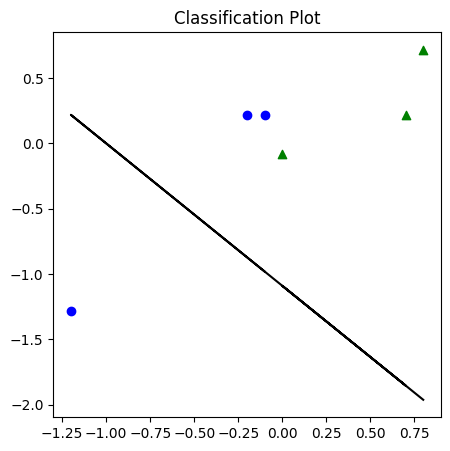

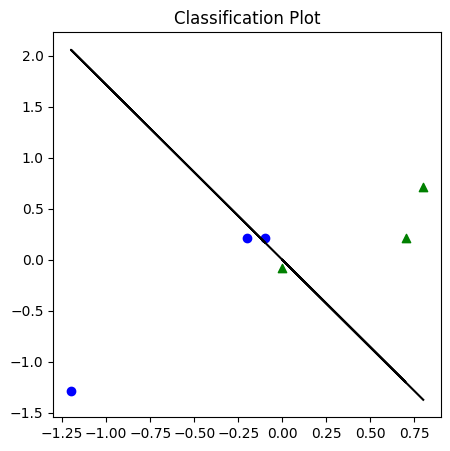

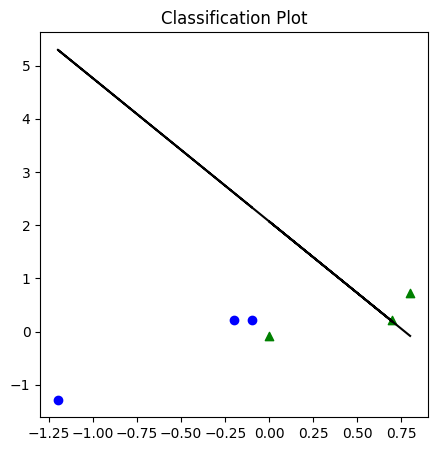

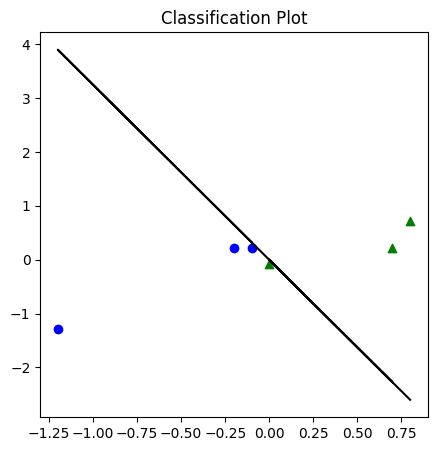

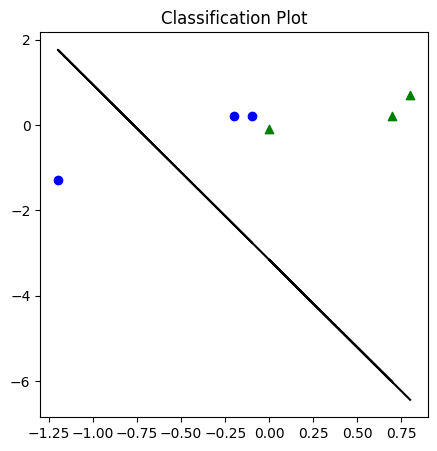

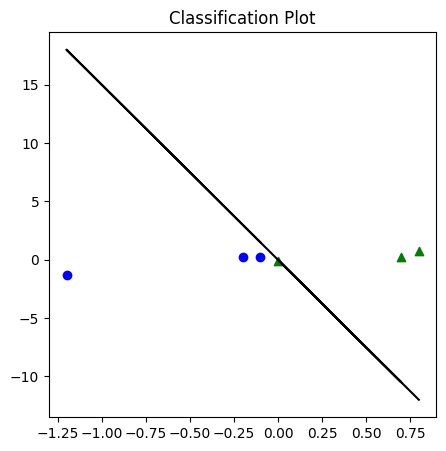

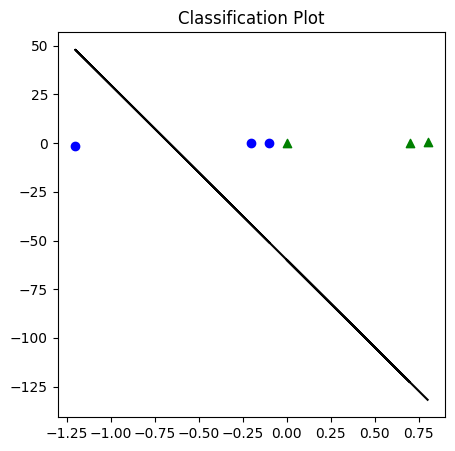

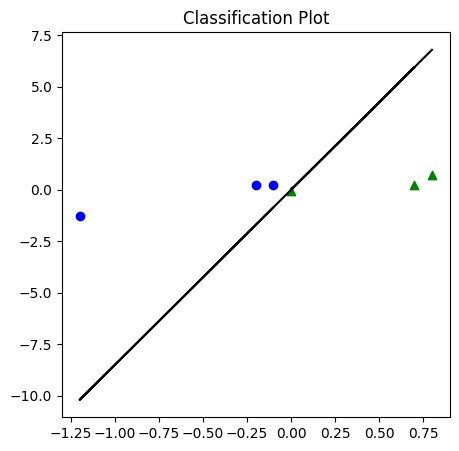

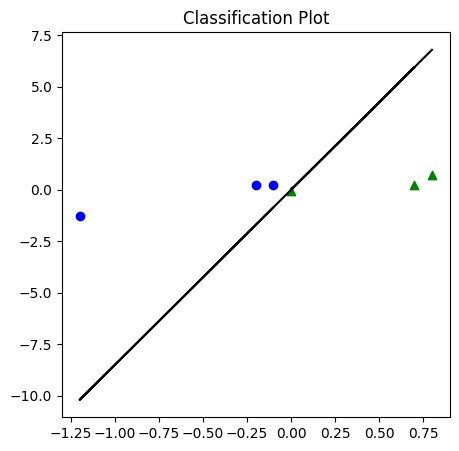

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([[1,1],[0.2,0.2],[0.9,0.5]])
y = np.array([[-1,-1],[0,0.5],[0.1,0.5]])
dataset= np.concatenate((x, y), axis=0) 
print("Given Training samples:\n",dataset)

dataset = dataset - np.mean(dataset,axis=0)
dataset = np.array([ np.array([float('%.4f' % p),float('%.4f' % q)]) for p,q in dataset ])
print("\nCalculated Mean Centered Input:\n",dataset)

z=[1,1,1, -1, -1, -1]
print("\nClassified Classes:\n",z)
plt.scatter(np.array(dataset[0:3,0]), np.array(dataset[0:3,1]), marker='^', label='+1',c='green')
plt.scatter(np.array(dataset[3:6,0]), np.array(dataset[3:6,1]), marker='o', label='-1',c='blue')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title("Dataset Plot")
plt.legend()
plt.show()

accuratelyClassified = 0
wts = [1,1]
wts = np.append(wts,0)
print("Initial Weight Vector wts: ",wts)

def show_graph():
    plt.figure(figsize=(5, 5))
    plt.scatter(np.array(dataset[0:3,0]), np.array(dataset[0:3,1]), marker='^', label='+1',c='green')
    plt.scatter(np.array(dataset[3:6,0]), np.array(dataset[3:6,1]), marker='o', label='-1',c='blue')
    plt.title("Classification Plot")
    print(dataset[:,0])
    divide_line = -(wts[0]/wts[1])*dataset[:,0] - (wts[2]/wts[1])
    plt.plot(dataset[:,0],divide_line,'k-')

iteration_no = 1

while (accuratelyClassified != len(dataset)):
    print("\nIteration number - ",iteration_no)
    for i in range(len(dataset)):
        x = np.append(dataset[i,0:2],1)
        print("\nx = ",x)
        print("w = ",wts,)
        print("w^Tx = ",np.dot(np.transpose(wts),x),"\n")

        if z[i]==1:
            if np.dot(np.transpose(wts),x)>=0:
                accuratelyClassified=accuratelyClassified+1
                print("-> Sample : ",dataset[i,0:2]," is +1")
            else:
                wts=wts+x
                print("-> New weight vector : ",wts)
                show_graph()
        else:
            if np.dot(np.transpose(wts),x)<0:
                accuratelyClassified=accuratelyClassified+1
                print("-> Sample : ",dataset[i,0:2]," is -1")
            else:
                wts=wts-x
                print("-> New weight vector : ",wts)
                show_graph()
        print("-"*100)

    if(accuratelyClassified != len(dataset)):
        accuratelyClassified=0 
    iteration_no = iteration_no + 1
    print("-"*100)
print("\nFinal weight vector : ",wts)   
show_graph()
